In [1]:
"""
import numpy as np
#from sqlalchemy import create_engine, text
import pandas as pd
import yaml
import ast
import json
import numpy as np
import scipy as sp
import copy
import os 
import pathlib
import sys
import requests
import io
import time
import re
import matplotlib.pyplot as plt

%matplotlib inline
"""

'\nimport numpy as np\n#from sqlalchemy import create_engine, text\nimport pandas as pd\nimport yaml\nimport ast\nimport json\nimport numpy as np\nimport scipy as sp\nimport copy\nimport os \nimport pathlib\nimport sys\nimport requests\nimport io\nimport time\nimport re\nimport matplotlib.pyplot as plt\n\n%matplotlib inline\n'

In [2]:
# all code is based on path /hpflex_vis/
#repo_path=pathlib.Path(os.getcwd()).parents[1].absolute().__str__()
#sys.path.insert(1,pathlib.Path(repo_path).absolute().__str__()) # repository path
#os.chdir(pathlib.Path(repo_path).absolute().__str__())
#
#sys.path.append('/Users/huangwp/Documents/git/HIL-Sim/flexlab/db_layer') 

In [3]:
# GENERAL PACKAGE IMPORT
# ----------------------
import sys
#sys.path.append('/Users/huangwp/Documents/git/HIL-Sim copy/flexlab/db_layer') 
#from db_interface import DB_Interface
import requests
import numpy as np
import pandas as pd
from pandas import DataFrame
from io import StringIO

import datetime as dt
import datetime
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.dates import date2num
import seaborn
import timeit
import json
import pickle

import matplotlib.pyplot as plt
import db_plotting

import yaml
import ast
import scipy as sp
import copy
import os 
import pathlib
import requests
import io
import time
import re





In [4]:
#from sysid.utility import * # this is currently to calculate  
#import database.volttron_helper.flexlab_json_parser as volttron_helper
#import database.database_util as database_util

In [5]:

import pytz
tz="US/Pacific"#metadata['tz']
"""
from datetime import datetime




# query start time in local time
"""
"""
start_date="2022-05-12 00:00:00"
end_date="2022-05-17 11:00:00"

start_date_utc=pd.Timestamp(start_date,tz=tz).tz_convert("UTC").strftime("%Y-%m-%d %H:%M:%S%z")
end_date_utc=pd.Timestamp(end_date,tz=tz).tz_convert("UTC").strftime("%Y-%m-%d %H:%M:%S%z")

"""

'\nstart_date="2022-05-12 00:00:00"\nend_date="2022-05-17 11:00:00"\n\nstart_date_utc=pd.Timestamp(start_date,tz=tz).tz_convert("UTC").strftime("%Y-%m-%d %H:%M:%S%z")\nend_date_utc=pd.Timestamp(end_date,tz=tz).tz_convert("UTC").strftime("%Y-%m-%d %H:%M:%S%z")\n\n'

In [6]:

# raw data from volttron database
#raw_json_history,raw_df_history=database_util.get_raw_history(start_time_utc=start_date_utc,end_time_utc=end_date_utc,database="volttron")


In [7]:
metadata={"bldg_name":"cella",
    "tz":"US/Pacific",
    "latitude":37.879134,
    "longitude":-122.254433,
    "tilt":[90],
    "surface_azimuth":[0],
    "Tref":22,
    "NRTU":1,
    "Ts_raw":60,
    "Ts_mpc":900,
    "database":"volttron"}
metadata_sysid={"Ts_sysid":300}

In [8]:
# formatting database
#df=volttron_helper.get_df_history(json_history=raw_json_history,end_time_utc=end_date_utc,start_time_utc=start_date_utc,metadata=metadata,metadata_sysid=metadata_sysid,dict_columns=None,estimate_Q_gain=True,cell="a")

#data22 = pd.read_csv('FlexlabX1aNoLeakBaseline1206.csv', parse_dates = True)


# Add Test and Experiment Data Start

In [9]:
df = pd.read_csv('data22_revised.csv', parse_dates = True, index_col = 0)
df1b = pd.read_csv('data23_revised.csv', parse_dates = True, index_col = 0)
#data22_original = pd.read_csv('data22_revised.csv', parse_dates = True, index_col = 0)

#data22 = pd.read_csv('FlexlabX1aNoLeakBaseline1202_weiping_0526.csv', parse_dates = True)



In [10]:
# below files are used on 08/14/2023
model_data21 = pd.read_csv('FlexlabX1aNoLeakBaseline_Calib_G36Paper_Spawn_Baseline.csv',encoding = 'latin1', parse_dates = True)

model_data22 = pd.read_csv('FlexlabX1aNoLeakBaseline_Calib_G36Paper_Spawn_Shed.csv', encoding = 'latin1',parse_dates = True)

model_data23 = pd.read_csv('FlexlabX1aNoLeakBaseline_Calib_G36Paper_Spawn_Shift.csv', encoding = 'latin1',parse_dates = True)



In [11]:
# below files are archived on 08/13/2023
"""
model_data21 = pd.read_csv('FlexlabX1aNoLeakBaseline_Calib_G36Paper_baseline.csv',encoding = 'latin1', parse_dates = True)

model_data22 = pd.read_csv('FlexlabX1aNoLeakBaseline_Calib_G36Paper_Shed.csv', encoding = 'latin1',parse_dates = True)



model_data231 = pd.read_csv('FlexlabX1aNoLeakBaseline_Calib_G36Paper_Shift_corrected_occupancy_schedule_0828.csv',encoding = 'latin1', parse_dates = True)
model_data231.drop(model_data231.tail(1).index,inplace=True)
model_data232 = pd.read_csv('FlexlabX1aNoLeakBaseline_Calib_G36Paper_Shift_corrected_occupancy_schedule_0829.csv',encoding = 'latin1', parse_dates = True)
model_data232.drop(model_data232.tail(1).index,inplace=True)
model_data233 = pd.read_csv('FlexlabX1aNoLeakBaseline_Calib_G36Paper_Shift_corrected_occupancy_schedule_0906.csv',encoding = 'latin1', parse_dates = True)
model_data233.drop(model_data233.tail(1).index,inplace=True)
model_data234 = pd.read_csv('FlexlabX1aNoLeakBaseline_Calib_G36Paper_Shift_corrected_occupancy_schedule_0907.csv',encoding = 'latin1', parse_dates = True)
model_data234.drop(model_data234.tail(1).index,inplace=True)

model_data23= model_data231.append(model_data232, ignore_index=True)
model_data23= model_data23.append(model_data233, ignore_index=True)
model_data23= model_data23.append(model_data234, ignore_index=True)

"""

"\nmodel_data21 = pd.read_csv('FlexlabX1aNoLeakBaseline_Calib_G36Paper_baseline.csv',encoding = 'latin1', parse_dates = True)\n\nmodel_data22 = pd.read_csv('FlexlabX1aNoLeakBaseline_Calib_G36Paper_Shed.csv', encoding = 'latin1',parse_dates = True)\n\n\n\nmodel_data231 = pd.read_csv('FlexlabX1aNoLeakBaseline_Calib_G36Paper_Shift_corrected_occupancy_schedule_0828.csv',encoding = 'latin1', parse_dates = True)\nmodel_data231.drop(model_data231.tail(1).index,inplace=True)\nmodel_data232 = pd.read_csv('FlexlabX1aNoLeakBaseline_Calib_G36Paper_Shift_corrected_occupancy_schedule_0829.csv',encoding = 'latin1', parse_dates = True)\nmodel_data232.drop(model_data232.tail(1).index,inplace=True)\nmodel_data233 = pd.read_csv('FlexlabX1aNoLeakBaseline_Calib_G36Paper_Shift_corrected_occupancy_schedule_0906.csv',encoding = 'latin1', parse_dates = True)\nmodel_data233.drop(model_data233.tail(1).index,inplace=True)\nmodel_data234 = pd.read_csv('FlexlabX1aNoLeakBaseline_Calib_G36Paper_Shift_corrected_occupa

In [ ]:
# below files are archived on 06/07/2023
"""

data21 = pd.read_csv('FlexlabX1aNoLeakBaseline_Calib_G36Paper_weiping.csv', parse_dates = True)
data22 = pd.read_csv('FlexlabX1aNoLeakBaseline_Calib_G36Paper_Shed.csv', parse_dates = True)
data23 = pd.read_csv('FlexlabX1aNoLeakBaseline_Calib_G36Paper_Shift.csv', parse_dates = True)

#data21 = pd.read_csv('FlexlabX1aNoLeakBaseline_G36paper_baseline.csv', parse_dates = True)
#data22 = pd.read_csv('FlexlabX1aNoLeakBaseline_G36paper_shed.csv', parse_dates = True)
#data23 = pd.read_csv('FlexlabX1aNoLeakBaseline_G36paper_shift.csv', parse_dates = True)


"""

# Test start, please delete later

In [12]:
#print(model_data231)

In [13]:
#print(model_data232)

# Test end, please delete later

In [14]:
# conversion
data21=model_data21
data22=model_data22
data23=model_data23

"\n\ndata21 = pd.read_csv('FlexlabX1aNoLeakBaseline_Calib_G36Paper_weiping.csv', parse_dates = True)\ndata22 = pd.read_csv('FlexlabX1aNoLeakBaseline_Calib_G36Paper_Shed.csv', parse_dates = True)\ndata23 = pd.read_csv('FlexlabX1aNoLeakBaseline_Calib_G36Paper_Shift.csv', parse_dates = True)\n\n#data21 = pd.read_csv('FlexlabX1aNoLeakBaseline_G36paper_baseline.csv', parse_dates = True)\n#data22 = pd.read_csv('FlexlabX1aNoLeakBaseline_G36paper_shed.csv', parse_dates = True)\n#data23 = pd.read_csv('FlexlabX1aNoLeakBaseline_G36paper_shift.csv', parse_dates = True)\n\n\n"

In [16]:
#data23 = pd.read_csv('data23_revised.csv', parse_dates = True, index_col = 0)
day_range=[8,22,23]

# use data23 here as the 1A FLEXLAB test with the 

In [17]:
data21["datetime"]=pd.to_datetime(data21["time"], unit='s',origin='2021-01-01') # change cumulative data to the "date" format
data22["datetime"]=pd.to_datetime(data22["time"], unit='s',origin='2021-01-01') # change cumulative data to the "date" format
data23["datetime"]=pd.to_datetime(data23["time"], unit='s',origin='2021-01-01') # change cumulative data to the "date" format

In [18]:
data21['datetime'] = pd.to_datetime(data21['datetime'])
data22['datetime'] = pd.to_datetime(data22['datetime'])
data23['datetime'] = pd.to_datetime(data23['datetime'])
df['datetime'] = pd.to_datetime(df['datetime'])
df1b['datetime'] = pd.to_datetime(df1b['datetime'])

data21=data21.set_index('datetime')
data22=data22.set_index('datetime')
data23=data23.set_index('datetime')
df['1B-OAT-1']=df['1B-OAT-1'].apply(lambda x: 1.8*x+32)
df1b['1B-OAT-1']=df1b['1B-OAT-1'].apply(lambda x: 1.8*x+32)

In [19]:
data22.dtypes

Unnamed: 0                                             int64
time                                                 float64
AHU: MAT                                             float64
AHU: RAT                                             float64
AHU: Supply Air Temperature                          float64
VAV: Core Zone Discharge Air Temperature             float64
VAV: North Zone Discharge Air Temperature            float64
VAV: South Zone Discharge Air Temperature            float64
VAV: Core Zone Airflow Rate                          float64
VAV: North Zone Airflow Rate                         float64
VAV: South Zone Airflow Rate                         float64
Outdoor Air Temperature                              float64
Supply Air Temperature Reset Setpoint                float64
Duct Static Pressure Reset Setpoint                  float64
Total Zone Pressure Reset Requests                   float64
Total Zone Cooling Requests                          float64
VAV: Core Zone Room Air 

In [20]:
print(data22)

                     Unnamed: 0        time   AHU: MAT   AHU: RAT  \
datetime                                                            
2021-08-13 00:00:00           0  19353600.0  68.000000  68.000000   
2021-08-13 00:05:00           1  19353900.0  66.662580  71.844284   
2021-08-13 00:10:00           2  19354200.0  66.399345  72.147120   
2021-08-13 00:15:00           3  19354500.0  65.692320  71.771820   
2021-08-13 00:20:00           4  19354800.0  65.237270  71.261020   
...                         ...         ...        ...        ...   
2021-09-14 23:40:00        9500  22203600.0  64.458830  66.835390   
2021-09-14 23:45:00        9501  22203900.0  64.461300  66.833145   
2021-09-14 23:50:00        9502  22204200.0  64.463230  66.832596   
2021-09-14 23:55:00        9503  22204500.0  64.464770  66.833970   
2021-09-15 00:00:00        9504  22204800.0  64.463440  66.830340   

                     AHU: Supply Air Temperature  \
datetime                                          

In [21]:
print(df)

                     desk1_plug_power  desk2_plug_power  desk3_plug_power  \
time                                                                        
2021-08-14 23:45:00               NaN               NaN               NaN   
2021-08-15 00:00:00         34.551340          7.982407         34.329447   
2021-08-15 00:15:00         34.011840          8.155340         34.268447   
2021-08-15 00:30:00         34.007553          7.948133         34.816873   
2021-08-15 00:45:00         33.910933          7.994260         33.885193   
...                               ...               ...               ...   
2021-09-13 22:45:00         34.063013          8.085613         34.899400   
2021-09-13 23:00:00         34.354260          7.867493         34.096140   
2021-09-13 23:15:00         34.234647          7.895540         34.129360   
2021-09-13 23:30:00         34.011333          8.097680         34.281927   
2021-09-13 23:45:00         34.132700          7.993800         34.273820   

In [22]:
df.dtypes

desk1_plug_power                         float64
desk2_plug_power                         float64
desk3_plug_power                         float64
desk4_plug_power                         float64
desk5_plug_power                         float64
desk6_plug_power                         float64
desk3_light_power                        float64
desk4_light_power                        float64
desk2_light_power                        float64
desk1_6_light_power                      float64
desk5_light_power                        float64
1A-VAV1-Zn_Temp                          float64
1A-VAV2-Zn_Temp                          float64
1A-VAV3-Zn_Temp                          float64
1A-VAV1-OccupiedCoolingSetpt             float64
1A-VAV1-UnoccupiedCoolingSetpt           float64
1A-VAV1-OccupiedHeatingSetpt             float64
1A-VAV1-UnoccupiedHeatingSetpt           float64
1A-VAV2-OccupiedCoolingSetpt             float64
1A-VAV2-UnoccupiedHeatingSetpt           float64
1A-VAV2-UnoccupiedCo

In [23]:
df1b.dtypes

desk3_light_power                        float64
desk1_light_power                        float64
desk5_light_power                        float64
desk2_light_power                        float64
desk6_light_power                        float64
desk4_light_power                        float64
desk1_plug_power                         float64
desk2_plug_power                         float64
desk3_plug_power                         float64
desk4_plug_power                         float64
desk5_plug_power                         float64
desk6_plug_power                         float64
1B-VAV1-Zn_Temp                          float64
1B-VAV2-Zn_Temp                          float64
1B-VAV3-Zn_Temp                          float64
1B-VAV1-OccupiedCoolingSetpt             float64
1B-VAV1-UnoccupiedCoolingSetpt           float64
1B-VAV1-OccupiedHeatingSetpt             float64
1B-VAV1-UnoccupiedHeatingSetpt           float64
1B-VAV2-OccupiedCoolingSetpt             float64
1B-VAV2-UnoccupiedHe

In [24]:
print(data22[['AHU: Cooling Coil Load','Outdoor Air Temperature']].head(50))

                     AHU: Cooling Coil Load  Outdoor Air Temperature
datetime                                                            
2021-08-13 00:00:00                0.000000                59.000000
2021-08-13 00:05:00              -27.314670                58.995220
2021-08-13 00:10:00              -12.646738                58.995163
2021-08-13 00:15:00              -13.670485                58.998627
2021-08-13 00:20:00               -7.439532                59.004448
2021-08-13 00:25:00               -4.356808                59.011536
2021-08-13 00:30:00               -2.636506                59.018784
2021-08-13 00:35:00               -1.735735                59.024940
2021-08-13 00:40:00               -1.216910                59.028893
2021-08-13 00:45:00               -0.866731                59.029552
2021-08-13 00:50:00               -0.631359                59.025707
2021-08-13 00:55:00               -0.468310                59.016260
2021-08-13 01:00:00               

In [25]:
#"""
#data21['AHU:Cooling Coil Load']=data21['AHU:Cooling Coil Load'].resample('15T', label='right', closed='right').mean() 
data21['AHU: Cooling Coil Load']=data21['AHU: Cooling Coil Load'].resample('15T', label='right', closed='right').mean() 
data21['AHU: Supply Fan Power']=data21['AHU: Supply Fan Power'].resample('15T', label='right', closed='right').mean() 
 



data21=data21.resample('15T').asfreq()

#data22['AHU:Cooling Coil Load']=data22['AHU:Cooling Coil Load'].resample('15T', label='right', closed='right').mean() 
data22['AHU: Cooling Coil Load']=data22['AHU: Cooling Coil Load'].resample('15T', label='right', closed='right').mean() 
data22['AHU: Supply Fan Power']=data22['AHU: Supply Fan Power'].resample('15T', label='right', closed='right').mean() 
 



data22=data22.resample('15T').asfreq()

#data23['AHU:Cooling Coil Load']=data23['AHU:Cooling Coil Load'].resample('15T', label='right', closed='right').mean() 
data23['AHU: Cooling Coil Load']=data23['AHU: Cooling Coil Load'].resample('15T', label='right', closed='right').mean() 
data23['AHU: Supply Fan Power']=data23['AHU: Supply Fan Power'].resample('15T', label='right', closed='right').mean() 
 



data23=data23.resample('15T').asfreq()


# I process data to 15 min interval so that the temperature dataset takes current time value
# but energy dataset takes mean value in the past 15 min
# in order to agree with FLEXLAB test data processing


#"""

In [26]:
"""
data21=data21.resample('15min').last()
data22=data22.resample('15min').last()
data23=data23.resample('15min').last()

"""

"\ndata21=data21.resample('15min').last()\ndata22=data22.resample('15min').last()\ndata23=data23.resample('15min').last()\n\n"

In [27]:
print(data22[['AHU: Cooling Coil Load','Outdoor Air Temperature']].head(50))

                     AHU: Cooling Coil Load  Outdoor Air Temperature
datetime                                                            
2021-08-13 00:00:00                0.000000                59.000000
2021-08-13 00:15:00              -17.877298                58.998627
2021-08-13 00:30:00               -4.810949                59.018784
2021-08-13 00:45:00               -1.273126                59.029552
2021-08-13 01:00:00               -0.484902                59.000000
2021-08-13 01:15:00               -0.180038                58.931114
2021-08-13 01:30:00               -0.064987                58.846245
2021-08-13 01:45:00               -0.018991                58.748302
2021-08-13 02:00:00               -0.001104                58.640030
2021-08-13 02:15:00               -0.020612                58.512040
2021-08-13 02:30:00               -0.010427                58.366253
2021-08-13 02:45:00                0.009652                58.222332
2021-08-13 03:00:00               

In [28]:


data21['datetime']=data21.index
data21['1B-OAT-1']=data21['Outdoor Air Temperature']



# add these columns so that later analysis codes don't return an error

In [29]:


data22['datetime']=data22.index
data22['1B-OAT-1']=data22['Outdoor Air Temperature']



# add these columns so that later analysis codes don't return an error

In [30]:


data23['datetime']=data23.index
data23['1B-OAT-1']=data23['Outdoor Air Temperature']



# add these columns so that later analysis codes don't return an error

In [31]:
print(data22.isnull().sum())   # normal if everything is zero

Unnamed: 0                                           0
time                                                 0
AHU: MAT                                             0
AHU: RAT                                             0
AHU: Supply Air Temperature                          0
VAV: Core Zone Discharge Air Temperature             0
VAV: North Zone Discharge Air Temperature            0
VAV: South Zone Discharge Air Temperature            0
VAV: Core Zone Airflow Rate                          0
VAV: North Zone Airflow Rate                         0
VAV: South Zone Airflow Rate                         0
Outdoor Air Temperature                              0
Supply Air Temperature Reset Setpoint                0
Duct Static Pressure Reset Setpoint                  0
Total Zone Pressure Reset Requests                   0
Total Zone Cooling Requests                          0
VAV: Core Zone Room Air Temperature                  0
1A-VAV2-OccupiedCoolingSetpt                         0
1A-VAV2-Oc

In [32]:
print(data22)

                     Unnamed: 0        time  AHU: MAT   AHU: RAT  \
datetime                                                           
2021-08-13 00:00:00           0  19353600.0  68.00000  68.000000   
2021-08-13 00:15:00           3  19354500.0  65.69232  71.771820   
2021-08-13 00:30:00           6  19355400.0  64.81287  70.790306   
2021-08-13 00:45:00           9  19356300.0  64.57875  70.573820   
2021-08-13 01:00:00          12  19357200.0  64.48827  70.419190   
...                         ...         ...       ...        ...   
2021-09-14 23:00:00        9492  22201200.0  64.35660  66.885650   
2021-09-14 23:15:00        9495  22202100.0  64.42532  66.866974   
2021-09-14 23:30:00        9498  22203000.0  64.45125  66.845060   
2021-09-14 23:45:00        9501  22203900.0  64.46130  66.833145   
2021-09-15 00:00:00        9504  22204800.0  64.46344  66.830340   

                     AHU: Supply Air Temperature  \
datetime                                           
2021-08-13 

In [33]:
print(df)

                     desk1_plug_power  desk2_plug_power  desk3_plug_power  \
time                                                                        
2021-08-14 23:45:00               NaN               NaN               NaN   
2021-08-15 00:00:00         34.551340          7.982407         34.329447   
2021-08-15 00:15:00         34.011840          8.155340         34.268447   
2021-08-15 00:30:00         34.007553          7.948133         34.816873   
2021-08-15 00:45:00         33.910933          7.994260         33.885193   
...                               ...               ...               ...   
2021-09-13 22:45:00         34.063013          8.085613         34.899400   
2021-09-13 23:00:00         34.354260          7.867493         34.096140   
2021-09-13 23:15:00         34.234647          7.895540         34.129360   
2021-09-13 23:30:00         34.011333          8.097680         34.281927   
2021-09-13 23:45:00         34.132700          7.993800         34.273820   

In [34]:

print(df['1A-El-CHWP'])
print('============================')
print(df1b['1B-El-CHWP'])

time
2021-08-14 23:45:00    56.543694
2021-08-15 00:00:00    56.540801
2021-08-15 00:15:00    56.583141
2021-08-15 00:30:00    56.613326
2021-08-15 00:45:00    56.580481
                         ...    
2021-09-13 22:45:00    56.791428
2021-09-13 23:00:00    56.757547
2021-09-13 23:15:00    56.736033
2021-09-13 23:30:00    56.795042
2021-09-13 23:45:00    56.604787
Name: 1A-El-CHWP, Length: 2881, dtype: float64
time
2021-08-14 23:45:00    57.898294
2021-08-15 00:00:00    57.083871
2021-08-15 00:15:00    56.797009
2021-08-15 00:30:00    56.871419
2021-08-15 00:45:00    56.805658
                         ...    
2021-09-13 22:45:00    55.550397
2021-09-13 23:00:00    55.566066
2021-09-13 23:15:00    55.836033
2021-09-13 23:30:00    56.273871
2021-09-13 23:45:00    57.130951
Name: 1B-El-CHWP, Length: 2881, dtype: float64


In [35]:
data21['date'] = data21['datetime'].apply(lambda x: datetime.date(x.year, x.month, x.day))
data21['time'] = data21['datetime'].apply(lambda x: datetime.time(x.hour, x.minute, x.second))

data22['date'] = data22['datetime'].apply(lambda x: datetime.date(x.year, x.month, x.day))
data22['time'] = data22['datetime'].apply(lambda x: datetime.time(x.hour, x.minute, x.second))


data23['date'] = data23['datetime'].apply(lambda x: datetime.date(x.year, x.month, x.day))
data23['time'] = data23['datetime'].apply(lambda x: datetime.time(x.hour, x.minute, x.second))

df['date'] = df['datetime'].apply(lambda x: datetime.date(x.year, x.month, x.day))
df['time'] = df['datetime'].apply(lambda x: datetime.time(x.hour, x.minute, x.second))

df1b['date'] = df1b['datetime'].apply(lambda x: datetime.date(x.year, x.month, x.day))
df1b['time'] = df1b['datetime'].apply(lambda x: datetime.time(x.hour, x.minute, x.second))

In [36]:
model_data_mask = (data21['date'] >= datetime.date(2021, 8, 15)) & (data21['date'] <= datetime.date(2021, 9, 13))
data21=data21.loc[model_data_mask]
#print(data21)

In [37]:
model_data_mask = (data22['date'] >= datetime.date(2021, 8, 15)) & (data22['date'] <= datetime.date(2021, 9, 13))
data22=data22.loc[model_data_mask]
#print(data22)

In [38]:
model_data_mask = (data23['date'] >= datetime.date(2021, 8, 15)) & (data23['date'] <= datetime.date(2021, 9, 13))
data23=data23.loc[model_data_mask]
#print(data23)

In [39]:
"""
baseline_day_mask = (df['date'] >= datetime.date(2021, 8, 21)) & (df['date'] <= datetime.date(2021, 8, 21))
test_day_mask22 = (data22['date'] >= datetime.date(2021, day_range[0], day_range[1])) & (data22['date'] <= datetime.date(2021, day_range[0], day_range[2])) 
test_day_mask23 = (df['date'] >= datetime.date(2021, day_range[0], day_range[1])) & (df['date'] <= datetime.date(2021, day_range[0], day_range[2]))
"""

"\nbaseline_day_mask = (df['date'] >= datetime.date(2021, 8, 21)) & (df['date'] <= datetime.date(2021, 8, 21))\ntest_day_mask22 = (data22['date'] >= datetime.date(2021, day_range[0], day_range[1])) & (data22['date'] <= datetime.date(2021, day_range[0], day_range[2])) \ntest_day_mask23 = (df['date'] >= datetime.date(2021, day_range[0], day_range[1])) & (df['date'] <= datetime.date(2021, day_range[0], day_range[2]))\n"

In [40]:

"""print(baseline_day_mask)
print(test_day_mask22)
print(test_day_mask23)
"""

'print(baseline_day_mask)\nprint(test_day_mask22)\nprint(test_day_mask23)\n'

In [41]:
"""
data_baseline0=df[baseline_day_mask]
data22 = data22[test_day_mask22]
"""
#df = df[test_day_mask23]
#print(data_baseline0)

'\ndata_baseline0=df[baseline_day_mask]\ndata22 = data22[test_day_mask22]\n'

In [42]:
"""
data_baseline0A=data_baseline0.copy(deep=True)
data_baseline0B=data_baseline0.copy(deep=True)
"""


'\ndata_baseline0A=data_baseline0.copy(deep=True)\ndata_baseline0B=data_baseline0.copy(deep=True)\n'

In [43]:
"""
data_baseline0A.index=data_baseline0A.index+pd.to_timedelta(1,unit='d')

data_baseline0B.index=data_baseline0B.index+pd.to_timedelta(2,unit='d')
#data_baseline = data_baseline0A
data_baseline = data_baseline0A.append(data_baseline0B)
#data_baseline = pd.concat(frames)
"""

# here I use the temperature setpoint data from date 08/21/2021 as the baseline temperature setpoint for the model 
# data (data22). I need to manually increment the days to match up the datatime for later plotting use

"\ndata_baseline0A.index=data_baseline0A.index+pd.to_timedelta(1,unit='d')\n\ndata_baseline0B.index=data_baseline0B.index+pd.to_timedelta(2,unit='d')\n#data_baseline = data_baseline0A\ndata_baseline = data_baseline0A.append(data_baseline0B)\n#data_baseline = pd.concat(frames)\n"

In [44]:
#print(data_baseline)

In [45]:
data21['gta_window'] = 0
data22['gta_window'] = 0
data23['gta_window'] = 0
df['gta_window'] = 0
df1b['gta_window'] = 0

gta_st = datetime.time(14,0,0)
gta_en = datetime.time(18,0,0)




gta_ts = (df['time'] > gta_st) & (df['time'] <= gta_en)
gta_ts21 = (data21['time'] > gta_st) & (data21['time'] <= gta_en)
gta_ts22 = (data22['time'] > gta_st) & (data22['time'] <= gta_en)
gta_ts23 = (data23['time'] > gta_st) & (data23['time'] <= gta_en)

data21['gta_window'][gta_ts21] = 1
data22['gta_window'][gta_ts22] = 1
data23['gta_window'][gta_ts23] = 1
df['gta_window'][gta_ts] = 1
df1b['gta_window'][gta_ts] = 1

print(data21['gta_window'][gta_ts21])
print(data22['gta_window'][gta_ts22])
print(data23['gta_window'][gta_ts23])
print(df['gta_window'][gta_ts])
print(df1b['gta_window'][gta_ts])

datetime
2021-08-15 14:15:00    1
2021-08-15 14:30:00    1
2021-08-15 14:45:00    1
2021-08-15 15:00:00    1
2021-08-15 15:15:00    1
                      ..
2021-09-13 17:00:00    1
2021-09-13 17:15:00    1
2021-09-13 17:30:00    1
2021-09-13 17:45:00    1
2021-09-13 18:00:00    1
Name: gta_window, Length: 480, dtype: int64
datetime
2021-08-15 14:15:00    1
2021-08-15 14:30:00    1
2021-08-15 14:45:00    1
2021-08-15 15:00:00    1
2021-08-15 15:15:00    1
                      ..
2021-09-13 17:00:00    1
2021-09-13 17:15:00    1
2021-09-13 17:30:00    1
2021-09-13 17:45:00    1
2021-09-13 18:00:00    1
Name: gta_window, Length: 480, dtype: int64
datetime
2021-08-15 14:15:00    1
2021-08-15 14:30:00    1
2021-08-15 14:45:00    1
2021-08-15 15:00:00    1
2021-08-15 15:15:00    1
                      ..
2021-09-13 17:00:00    1
2021-09-13 17:15:00    1
2021-09-13 17:30:00    1
2021-09-13 17:45:00    1
2021-09-13 18:00:00    1
Name: gta_window, Length: 480, dtype: int64
time
2021-08-15 

/var/folders/31/7jjh3bzd6_d_tmg49kbcdsb40000gp/T/ipykernel_2756/3789731522.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data21['gta_window'][gta_ts21] = 1
/var/folders/31/7jjh3bzd6_d_tmg49kbcdsb40000gp/T/ipykernel_2756/3789731522.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data22['gta_window'][gta_ts22] = 1
/var/folders/31/7jjh3bzd6_d_tmg49kbcdsb40000gp/T/ipykernel_2756/3789731522.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-v

In [46]:
data22['date']

datetime
2021-08-15 00:00:00    2021-08-15
2021-08-15 00:15:00    2021-08-15
2021-08-15 00:30:00    2021-08-15
2021-08-15 00:45:00    2021-08-15
2021-08-15 01:00:00    2021-08-15
                          ...    
2021-09-13 22:45:00    2021-09-13
2021-09-13 23:00:00    2021-09-13
2021-09-13 23:15:00    2021-09-13
2021-09-13 23:30:00    2021-09-13
2021-09-13 23:45:00    2021-09-13
Freq: 15T, Name: date, Length: 2880, dtype: object

In [47]:
print(data22.columns)
print(df.columns)
#print(data22_original.columns)

Index(['Unnamed: 0', 'time', 'AHU: MAT', 'AHU: RAT',
       'AHU: Supply Air Temperature',
       'VAV: Core Zone Discharge Air Temperature',
       'VAV: North Zone Discharge Air Temperature',
       'VAV: South Zone Discharge Air Temperature',
       'VAV: Core Zone Airflow Rate', 'VAV: North Zone Airflow Rate',
       'VAV: South Zone Airflow Rate', 'Outdoor Air Temperature',
       'Supply Air Temperature Reset Setpoint',
       'Duct Static Pressure Reset Setpoint',
       'Total Zone Pressure Reset Requests', 'Total Zone Cooling Requests',
       'VAV: Core Zone Room Air Temperature', '1A-VAV2-OccupiedCoolingSetpt',
       '1A-VAV2-OccupiedHeatingSetpt', 'VAV: Core Zone Reheat Control Signal',
       'VAV: Core Zone Damper Control Signal',
       'VAV: North Zone Room Air Temperature', 'Tcool_SP',
       '1A-VAV1-OccupiedCoolingSetpt', 'Theat_SP',
       '1A-VAV1-OccupiedHeatingSetpt', 'VAV: North Zone Reheat Control Signal',
       'VAV: North Zone Damper Control Signal',
      

### Metrics

In [48]:
data21 = data21.assign(COP='COP') 
#data21['COP'] = data21['oat_C'].apply(lambda x: (0.548 + 0.0951*x + (-7.63E-04)*x**2))
data21['COP'] = 2.9

In [49]:
data22 = data22.assign(COP='COP') 
#data22['COP'] = data22['oat_C'].apply(lambda x: (0.548 + 0.0951*x + (-7.63E-04)*x**2))
data22['COP'] = 2.9

In [50]:
data23 = data23.assign(COP='COP') 
#data23['COP'] = data23['oat_C'].apply(lambda x: (0.548 + 0.0951*x + (-7.63E-04)*x**2))
data23['COP'] = 2.9

In [51]:




df = df.assign(COP='COP') 
df1b = df1b.assign(COP='COP') 
#data23['COP'] = data23['oat_C'].apply(lambda x: (0.548 + 0.0951*x + (-7.63E-04)*x**2))
df['COP'] = 2.9
df1b['COP'] = 2.9


In [52]:
data21 = data21.assign(chiller = 'Chiller_load') 
data21['Chiller_load'] = (data21['AHU: Cooling Coil Load']/data21['COP'])


# if change to 1/1.225, can comment out the first 2 lines
data21['AHU: Supply Fan Airflow Rate [m3/s]']=data21['AHU: Supply Fan Airflow Rate'].apply(lambda x: (x/2118.88))
data21['AHU: Supply Fan Power']=data21['AHU: Supply Fan Airflow Rate [m3/s]'].apply(lambda x: (27*x**2+325*x+148))

data21['cooling_power [W]'] = data21['AHU: Supply Fan Power'] + data21['Chiller_load']
#data21['cooling_power [W]'] = data21['AHU: Supply Fan Power']
#data21['cooling_power [W]'] =data21['Chiller_load']

In [53]:
data22 = data22.assign(chiller = 'Chiller_load') 
data22['Chiller_load'] = (data22['AHU: Cooling Coil Load']/data22['COP'])


# if change to 1/1.225, can comment out the first 2 lines
data22['AHU: Supply Fan Airflow Rate [m3/s]']=data22['AHU: Supply Fan Airflow Rate'].apply(lambda x: (x/2118.88))
data22['AHU: Supply Fan Power']=data22['AHU: Supply Fan Airflow Rate [m3/s]'].apply(lambda x: (27*x**2+325*x+148))

data22['cooling_power [W]'] = data22['AHU: Supply Fan Power'] + data22['Chiller_load']
#data22['cooling_power [W]'] = data22['AHU: Supply Fan Power']
#data22['cooling_power [W]'] =  data22['Chiller_load']

In [54]:
data23 = data23.assign(chiller = 'Chiller_load') 
data23['Chiller_load'] = (data23['AHU: Cooling Coil Load']/data23['COP'])


# if change to 1/1.225, can comment out the first 2 lines
data23['AHU: Supply Fan Airflow Rate [m3/s]']=data23['AHU: Supply Fan Airflow Rate'].apply(lambda x: (x/2118.88))
data23['AHU: Supply Fan Power']=data23['AHU: Supply Fan Airflow Rate [m3/s]'].apply(lambda x: (27*x**2+325*x+148))

data23['cooling_power [W]'] = data23['AHU: Supply Fan Power'] + data23['Chiller_load']
#data23['cooling_power [W]'] =  data23['AHU: Supply Fan Power'] 
#data23['cooling_power [W]'] = data23['Chiller_load']

In [55]:


df = df.assign(chiller = 'Chiller_load') 
df['Chiller_load'] = (df['1A-Th-Chilled Water']/df['COP'])*-1


#df['cooling_power [W]'] =df['1A-El-AHU'] 

df['cooling_power [W]'] = df['1A-El-AHU'] + df['Chiller_load']#+ df['1A-El-Exhaust Fan']+ df['1A-El-CHWP']
#data23['cooling_power [W]'] = data23['1B-El-AHU'] + data23['1B-El-Exhaust Fan'] + data23['1B-El-CHWP'] + data23['Chiller_load']
#df['cooling_power [W]'] = df['Chiller_load']



df1b = df1b.assign(chiller = 'Chiller_load') 
df1b['Chiller_load'] = (df1b['1B-Th-Chilled Water']/df['COP'])*-1

#df1b['cooling_power [W]'] =  df1b['1B-El-AHU']
df1b['cooling_power [W]'] = df1b['1B-El-AHU'] + df1b['Chiller_load']#+ df1b['1B-El-Exhaust Fan']+ df1b['1B-El-CHWP']


#df1b['cooling_power [W]'] =  df1b['Chiller_load']

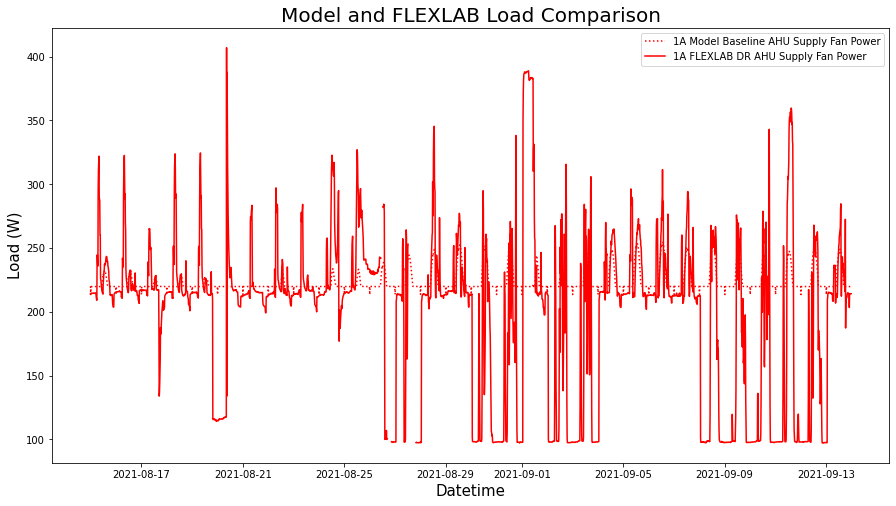

In [56]:


#'''
fig,ax_left=plt.subplots()

fig.set_size_inches(15, 8)

lns1=ax_left.plot(data21.index,data21['AHU: Supply Fan Power'],'r:',label="1A Model Baseline AHU Supply Fan Power")
#lns2=ax_left.plot(data21.index,data21['Chiller_load'],'b:', label="1A Model Baseline Chiller Load")
lns3=ax_left.plot(df.index,df['1A-El-AHU'],'r-', label="1A FLEXLAB DR AHU Supply Fan Power")
#lns4=ax_left.plot(df.index,df['Chiller_load'],'b-', label="1A FLEXLAB DR Chiller Load")
plt.title('Model and FLEXLAB Load Comparison',fontsize=20)
ax_left.set_xlabel('Datetime',fontsize=15)
ax_left.set_ylabel('Load (W)',fontsize=15)

#lns=lns1+lns2+lns3+lns4
lns=lns1+lns3
labs=[l.get_label() for l in lns]
ax_left.legend(lns,labs,bbox_to_anchor=(1, 1),loc=1,fontsize=10)
#ax_left.set_ylim([50,68.3])
#ax_right.set_ylim([-0.1,2.4])
plt.show()
#'''

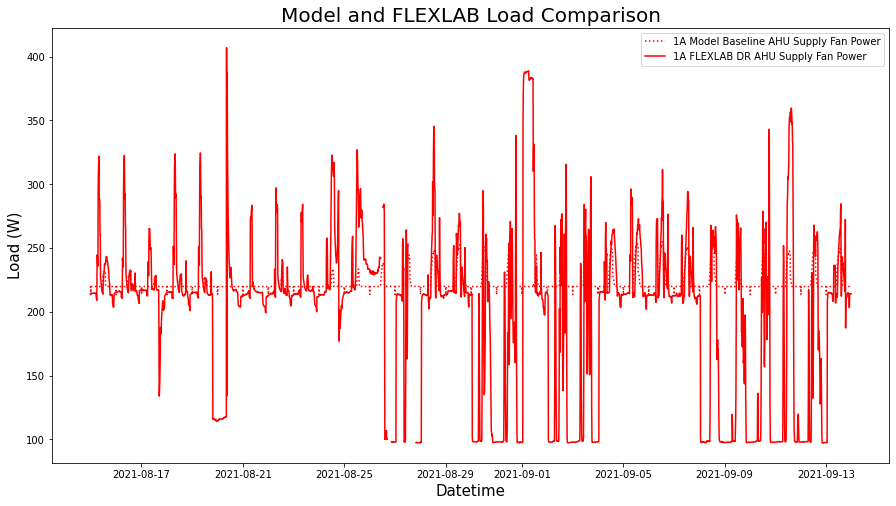

In [57]:
#'''
fig,ax_left=plt.subplots()

fig.set_size_inches(15, 8)

lns1=ax_left.plot(data22.index,data22['AHU: Supply Fan Power'],'r:',label="1A Model Baseline AHU Supply Fan Power")
#lns2=ax_left.plot(data22.index,data22['Chiller_load'],'b:', label="1A Model Baseline Chiller Load")
lns3=ax_left.plot(df.index,df['1A-El-AHU'],'r-', label="1A FLEXLAB DR AHU Supply Fan Power")
#lns4=ax_left.plot(df.index,df['Chiller_load'],'b-', label="1A FLEXLAB DR Chiller Load")
plt.title('Model and FLEXLAB Load Comparison',fontsize=20)
ax_left.set_xlabel('Datetime',fontsize=15)
ax_left.set_ylabel('Load (W)',fontsize=15)

#lns=lns1+lns2+lns3+lns4
lns=lns1+lns3
labs=[l.get_label() for l in lns]
ax_left.legend(lns,labs,bbox_to_anchor=(1, 1),loc=1,fontsize=10)
#ax_left.set_ylim([50,68.3])
#ax_right.set_ylim([-0.1,2.4])
plt.show()
#'''

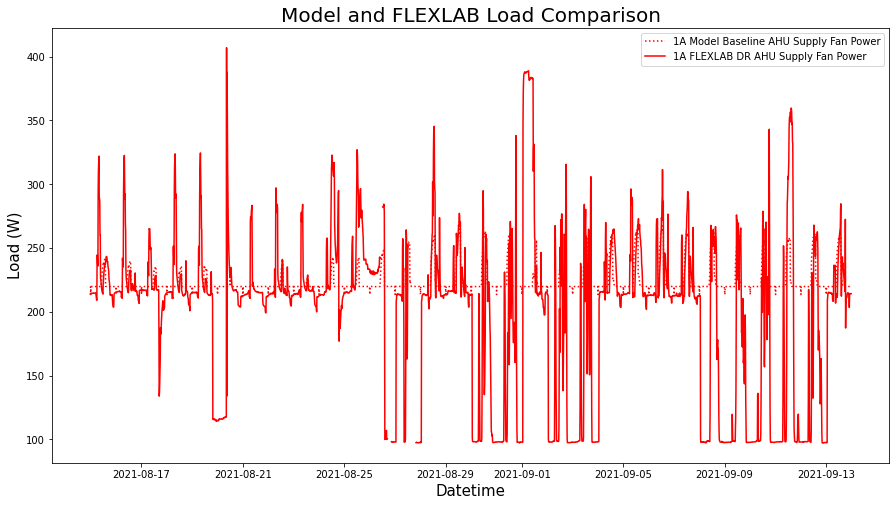

In [58]:
#'''
fig,ax_left=plt.subplots()

fig.set_size_inches(15, 8)

lns1=ax_left.plot(data23.index,data23['AHU: Supply Fan Power'],'r:',label="1A Model Baseline AHU Supply Fan Power")
#lns2=ax_left.plot(data23.index,data23['Chiller_load'],'b:', label="1A Model Baseline Chiller Load")
lns3=ax_left.plot(df.index,df['1A-El-AHU'],'r-', label="1A FLEXLAB DR AHU Supply Fan Power")
#lns4=ax_left.plot(df.index,df['Chiller_load'],'b-', label="1A FLEXLAB DR Chiller Load")
plt.title('Model and FLEXLAB Load Comparison',fontsize=20)
ax_left.set_xlabel('Datetime',fontsize=15)
ax_left.set_ylabel('Load (W)',fontsize=15)

#lns=lns1+lns2+lns3+lns4
lns=lns1+lns3
labs=[l.get_label() for l in lns]
ax_left.legend(lns,labs,bbox_to_anchor=(1, 1),loc=1,fontsize=10)
#ax_left.set_ylim([50,68.3])
#ax_right.set_ylim([-0.1,2.4])
plt.show()
#'''

In [59]:
df.dtypes

desk1_plug_power                         float64
desk2_plug_power                         float64
desk3_plug_power                         float64
desk4_plug_power                         float64
desk5_plug_power                         float64
desk6_plug_power                         float64
desk3_light_power                        float64
desk4_light_power                        float64
desk2_light_power                        float64
desk1_6_light_power                      float64
desk5_light_power                        float64
1A-VAV1-Zn_Temp                          float64
1A-VAV2-Zn_Temp                          float64
1A-VAV3-Zn_Temp                          float64
1A-VAV1-OccupiedCoolingSetpt             float64
1A-VAV1-UnoccupiedCoolingSetpt           float64
1A-VAV1-OccupiedHeatingSetpt             float64
1A-VAV1-UnoccupiedHeatingSetpt           float64
1A-VAV2-OccupiedCoolingSetpt             float64
1A-VAV2-UnoccupiedHeatingSetpt           float64
1A-VAV2-UnoccupiedCo

In [60]:
df1b.dtypes

desk3_light_power                        float64
desk1_light_power                        float64
desk5_light_power                        float64
desk2_light_power                        float64
desk6_light_power                        float64
desk4_light_power                        float64
desk1_plug_power                         float64
desk2_plug_power                         float64
desk3_plug_power                         float64
desk4_plug_power                         float64
desk5_plug_power                         float64
desk6_plug_power                         float64
1B-VAV1-Zn_Temp                          float64
1B-VAV2-Zn_Temp                          float64
1B-VAV3-Zn_Temp                          float64
1B-VAV1-OccupiedCoolingSetpt             float64
1B-VAV1-UnoccupiedCoolingSetpt           float64
1B-VAV1-OccupiedHeatingSetpt             float64
1B-VAV1-UnoccupiedHeatingSetpt           float64
1B-VAV2-OccupiedCoolingSetpt             float64
1B-VAV2-UnoccupiedHe

# Add Test and Experiment Data End

In [61]:
#df['timestamp_utc']=pd.to_datetime(df['datetime']).tz_localize(tz).tz_convert("UTC").dt.strftime("%Y-%m-%d %H:%M:%S%z")




#df['timestamp_utc']=pd.to_datetime(df['datetime']).dt.tz_convert("UTC").dt.strftime("%Y-%m-%d %H:%M:%S%z")
#df['timestamp_utc']=pd.to_datetime(df['datetime']).dt.tz_localize("UTC").dt.strftime("%Y-%m-%d %H:%M:%S%z")
#df['timestamp_utc']=pd.Timestamp(pd.to_datetime(df['datetime']),tz=tz).localize("UTC").strftime("%Y-%m-%d %H:%M:%S%z")
#comb_df['WeekEnd'] = comb_df['WeekEnd'].dt.tz_localize('US/Pacific')
#start_date_utc=pd.Timestamp(start_date,tz=tz).tz_convert("UTC").strftime("%Y-%m-%d %H:%M:%S%z")

In [62]:
# interpolation except for timestamp
for cname in data21.columns:
    if re.search("datetime",cname):
        pass
    else:
        data21[cname]=data21[cname].interpolate()

#df['time']=pd.to_datetime(df['timestamp_utc']).dt.tz_convert("US/Pacific").dt.strftime("%Y-%m-%d %H:%M:%S")
data21['time']=pd.to_datetime(data21['datetime'])
data21['hour']=pd.DatetimeIndex(data21['time']).strftime("%H")
data21['hour'].to_numpy().astype('float').astype('int')
data21['day']=pd.to_datetime(data21['time']).dt.strftime("%d").to_numpy().astype('int')

In [63]:
# interpolation except for timestamp
for cname in data22.columns:
    if re.search("datetime",cname):
        pass
    else:
        data22[cname]=data22[cname].interpolate()

#df['time']=pd.to_datetime(df['timestamp_utc']).dt.tz_convert("US/Pacific").dt.strftime("%Y-%m-%d %H:%M:%S")
data22['time']=pd.to_datetime(data22['datetime'])
data22['hour']=pd.DatetimeIndex(data22['time']).strftime("%H")
data22['hour'].to_numpy().astype('float').astype('int')
data22['day']=pd.to_datetime(data22['time']).dt.strftime("%d").to_numpy().astype('int')

In [64]:
# interpolation except for timestamp
for cname in data23.columns:
    if re.search("datetime",cname):
        pass
    else:
        data23[cname]=data23[cname].interpolate()

#df['time']=pd.to_datetime(df['timestamp_utc']).dt.tz_convert("US/Pacific").dt.strftime("%Y-%m-%d %H:%M:%S")
data23['time']=pd.to_datetime(data23['datetime'])
data23['hour']=pd.DatetimeIndex(data23['time']).strftime("%H")
data23['hour'].to_numpy().astype('float').astype('int')
data23['day']=pd.to_datetime(data23['time']).dt.strftime("%d").to_numpy().astype('int')

In [65]:






for cname in df.columns:
    if re.search("datetime",cname):
        pass
    else:
        df[cname]=df[cname].interpolate()

        
for cname in df1b.columns:
    if re.search("datetime",cname):
        pass
    else:
        df1b[cname]=df1b[cname].interpolate()
# add time information.





df['time']=pd.to_datetime(df['datetime'])
df['hour']=pd.DatetimeIndex(df['time']).strftime("%H")
df['hour'].to_numpy().astype('float').astype('int')
df['day']=pd.to_datetime(df['time']).dt.strftime("%d").to_numpy().astype('int')


df1b['time']=pd.to_datetime(df1b['datetime'])
df1b['hour']=pd.DatetimeIndex(df1b['time']).strftime("%H")
df1b['hour'].to_numpy().astype('float').astype('int')
df1b['day']=pd.to_datetime(df1b['time']).dt.strftime("%d").to_numpy().astype('int')



In [66]:
#print(df)

In [67]:
# change column names
# this is only for XRA 

"""
df=df.rename(columns={"V_sa_1":"V_sa_0",
                  "V_ra_1":"V_ra_0",
                  "T_sa_1":"T_sa_0",
                  "T_ra_1":"T_ra_0",
                  "T_slab_1_0":"T_slab_0_0",
                  "T_slab_1_1":"T_slab_0_1",
                  "T_slab_1_2":"T_slab_0_2",
                  "T_zap_1_0":"T_zap_0_0",
                  "T_zap_1_1":"T_zap_0_1",
                  "T_hsp_1":"T_hsp_0",
                  "i_occ_1":"i_occ_0",
                  "i_vent_1":"i_vent_0",
                  "T_za_1":"T_za_0",
                  "Q_gain_1":"Q_gain_0",
                  "m_sa_1":"m_sa_0",
                  "Q_hc_1":"Q_hc_0",
                  "P_hp_1":"P_hp_0",
                  "pi_1":"i_heat_0"
                  })
"""
# zone air temperature is mean of two idbts sensors
#df['T_za_0']=(df['T_zap_0_1'].to_numpy()+df['T_zap_0_0'].to_numpy())/2

'\ndf=df.rename(columns={"V_sa_1":"V_sa_0",\n                  "V_ra_1":"V_ra_0",\n                  "T_sa_1":"T_sa_0",\n                  "T_ra_1":"T_ra_0",\n                  "T_slab_1_0":"T_slab_0_0",\n                  "T_slab_1_1":"T_slab_0_1",\n                  "T_slab_1_2":"T_slab_0_2",\n                  "T_zap_1_0":"T_zap_0_0",\n                  "T_zap_1_1":"T_zap_0_1",\n                  "T_hsp_1":"T_hsp_0",\n                  "i_occ_1":"i_occ_0",\n                  "i_vent_1":"i_vent_0",\n                  "T_za_1":"T_za_0",\n                  "Q_gain_1":"Q_gain_0",\n                  "m_sa_1":"m_sa_0",\n                  "Q_hc_1":"Q_hc_0",\n                  "P_hp_1":"P_hp_0",\n                  "pi_1":"i_heat_0"\n                  })\n'

In [68]:
# heatpump power + all plug load = total power
#df['P_all_0']=df['P_hp_0'].to_numpy()+df['Q_gain_0'].to_numpy()

In [69]:
# MPC setpoint addition.
def add_mpc_inputs(df_):
    forecast_hours=24

    hsp_o=70  # 21.11C heating setpoint occupied
    hsp_uo=60 # 15.56C

    csp_o=74
    csp_uo=80

    o_start=6 #from 5am 
    o_end=17  #till 20pm
    # one day hours
    one_day_hours=np.arange(24)    
    # one_day_hours=np.array((pd.Timestamp(current_time_local,tz="US/Pacific")+pd.timedelta_range(start='0 H', periods=forecast_hours,freq='1H')).strftime("%H")).astype('int')
    uo_idx=(one_day_hours<o_start)|(one_day_hours>o_end)
    o_idx=~uo_idx
    #hour_vec
    Thsp_base=np.zeros(forecast_hours)+(hsp_uo-32)/1.8
    Tcsp_base=np.zeros(forecast_hours)+(csp_uo-32)/1.8
    Thsp_base[o_idx]=(hsp_o-32)/1.8
    Tcsp_base[o_idx]=(csp_o-32)/1.8
    Thsp_base[5]=(68-32)/1.8 # 68F at 5AM.

    # price signal
    ER_evening=np.array([0.264,	0.241,	0.220,	0.221,	0.238	,0.378	,0.700,	0.466,	0.351	,0.297,	0.264,	0.241	,0.220,	0.221	,0.238,	0.292,	0.378,	0.592,	0.690,	0.700,	0.629,	0.541	,0.445	,0.405])


    hour_vec=df_['hour'].to_numpy().astype('int')#.astype('int')  #np.array((pd.Timestamp(current_time_local,tz="US/Pacific")+pd.timedelta_range(start='0 H', periods=forecast_hours*(3600/Ts),freq=pd.Timedelta(f"{Ts}sec"))).strftime("%H")).astype('int')
    Tcsp=Tcsp_base[hour_vec]
    Thsp=Thsp_base[hour_vec]
    prices=ER_evening[hour_vec]
    hvac_occ=(o_idx*1)[hour_vec]
    df_['Thsp']=Thsp
    df_['Tcsp']=Tcsp
    df_['price']=prices
    return df_

In [70]:
df=add_mpc_inputs(df)
df1b=add_mpc_inputs(df1b)

In [71]:
#df['time']
#df

In [72]:
#df.dtypes

In [73]:
#df.index

In [74]:
#df1b.dtypes

In [75]:
"""
if test_case==1: # G36+baseline days: 1A(Aug: 30,31; Sep: 2,3,9,10,11,12,13) 1B(Aug: 15,24,25)
    mpc_days=np.array([30,31,2,3,9,10,11,12,13])  
    mpc_days_1b=np.array([15,24,25])  
# make sure you don't have overlapping days in your "Flexlab_HIL_DA_db_query_file.ipynb"
# since this code doesn't take into account of the month that the day is in
"""

"""
elif test_case==3: # G36+shift days: 1A() 1B(Aug: 28,29,30,31; Sep: 4,5,6,9)
    mpc_days=np.array([])  
    mpc_days_1b=np.array([28,29,30,31,4,5,6,9]) 
"""
"""
if final_case==1: # G36+baseline days: 1A(Aug: 30,31; Sep: 2,3,9,10,11,12,13) 1B(Aug: 15)
    final_days=np.array([30,31,2,3,9,10,11,12,13])  
    final_days_1b=np.array([15,24,25])  
# make sure you don't have overlapping days in your "Flexlab_HIL_DA_db_query_file.ipynb"
# since this code doesn't take into account of the month that the day is in
"""

"""
elif final_case==2: # G36+shed days: 1A() 1B(Aug: 22,23; Sep: 2,3,10,11,12,13)
    final_days=np.array([])  
    final_days_1b=np.array([22,23,2,3,10,11,12,13]) 
"""

"""
elif control_case==2: # G36+shed days: 1A() 1B(Aug: 22,23; Sep: 2,3,10,11,12,13)
    baseline_days=np.array([])  
    baseline_days_1b=np.array([22,23,2,3,10,11,12,13]) 

elif control_case==3: # G36+shift days: 1A() 1B(Aug: 28,29,30,31; Sep: 4,5,6,9)
    baseline_days=np.array([])  
    baseline_days_1b=np.array([28,29,30,31,4,5,6,9])    
"""    



#  basecase
#baseline_days=np.array([22,23])
#baseline_days_1b=np.array([15])
#all_days=np.concatenate([mpc_days,baseline_days])
#all_days_1b=np.concatenate([mpc_days_1b,baseline_days_1b

# make sure you don't have overlapping days in your "Flexlab_HIL_DA_db_query_file.ipynb"
# since this code doesn't take into account of the month that the day is in

'\nelif control_case==2: # G36+shed days: 1A() 1B(Aug: 22,23; Sep: 2,3,10,11,12,13)\n    baseline_days=np.array([])  \n    baseline_days_1b=np.array([22,23,2,3,10,11,12,13]) \n\nelif control_case==3: # G36+shift days: 1A() 1B(Aug: 28,29,30,31; Sep: 4,5,6,9)\n    baseline_days=np.array([])  \n    baseline_days_1b=np.array([28,29,30,31,4,5,6,9])    \n'

In [76]:
baseline_case=1 
shed_case=2 
shift_case=3

In [77]:



# All G36+baseline days: 1A(Aug: 30,31; Sep: 2,3,8,9,10,11,12) 1B(Aug: 15,24,25  Sep: 2,3)
# Bad day:, 09/11 on 1A
# days not used for other reasons:  09/08 on 1A

baseline_days=np.array([30,31,2,3,9,10,12])  
baseline_days_1b=np.array([15,24,25,2,3])

#baseline_days=np.array([8]) 
#baseline_days_1b=np.array([])


# All G36+shed days: 1A() 1B(Aug: 20,21, 22,23; Sep: 1,10,11,12,13) 
# Bad day: 09/01 on 1B, 09/11 on 1B
# days not used for other reasons: 08/20, 08/21, 08/23

shed_days=np.array([])  
shed_days_1b=np.array([22,10,12,13]) 


# All G36+shift days: 1A() 1B(Aug: 26,27,28,29,30,31; Sep: 4,5,6,7,8,9)
#Bad day:  Aug 27 on 1B, Sep 07 on 1B, Sep 08 on 1B,

shift_days=np.array([])  
shift_days_1b=np.array([26,28,29,30,31,4,5,6,9]) 

    



In [78]:
#print(all_days)
#print(all_days_1b)

In [79]:

"""
def calculate_ma(df_,rolling_mins,col_name):
    df[f'ma_{col_name}']=df[f'{col_name}'].rolling(rolling_mins,center=True,min_periods=1).mean()#
    return df_
"""

"\ndef calculate_ma(df_,rolling_mins,col_name):\n    df[f'ma_{col_name}']=df[f'{col_name}'].rolling(rolling_mins,center=True,min_periods=1).mean()#\n    return df_\n"

In [80]:
# calculate moving average (smoothing)
#rolling_mins=30 #moving average interval (30-timestep: 30mins)

#df=calculate_ma(df_=df,rolling_mins=rolling_mins,col_name="i_heat_0")
#df=calculate_ma(df_=df,rolling_mins=rolling_mins,col_name="P_hp_0")
#df=calculate_ma(df_=df,rolling_mins=rolling_mins,col_name="P_all_0")


In [81]:
df['final']=(df.day.isin(shift_days)).to_numpy()*1 #mpc days as True
df['mpc']=(df.day.isin(shed_days)).to_numpy()*1 #mpc days as True
df['baseline']=(df.day.isin(baseline_days)).to_numpy()*1 #baseline days as True
# ultimate the basecase data is from a different source
df1b['final']=(df1b.day.isin(shift_days_1b)).to_numpy()*1 #mpc days as True
df1b['mpc']=(df1b.day.isin(shed_days_1b)).to_numpy()*1 #mpc days as True
df1b['baseline']=(df1b.day.isin(baseline_days_1b)).to_numpy()*1 #baseline days as True


In [82]:
hours=df['hour'].to_numpy().astype('int') #hour 
#df['peak']=(((hours>=5) &(hours<=7))|((hours>=17) &(hours<=21)))*1 #masking peak period
#df1b['peak']=(((hours>=5) &(hours<=7))|((hours>=17) &(hours<=21)))*1 #masking peak period




#df['peak']=((hours>=14) &(hours<18))*1
#df1b['peak']=((hours>=14) &(hours<18))*1
df['peak']=(  ((df["time"].apply(lambda x : x.hour)>=14) & (df["time"].apply(lambda x : x.hour)<18))  |  ((df["time"].apply(lambda x : x.hour)==18) & (df["time"].apply(lambda x : x.minute)==0))    )*1
df1b['peak']=(  ((df1b["time"].apply(lambda x : x.hour)>=14) & (df1b["time"].apply(lambda x : x.hour)<18)) | ((df1b["time"].apply(lambda x : x.hour)==18) & (df1b["time"].apply(lambda x : x.minute)==0))   )*1

df['precool']=(  ((df["time"].apply(lambda x : x.hour)>=10) & (df["time"].apply(lambda x : x.hour)<14))  |  ((df["time"].apply(lambda x : x.hour)==14) & (df["time"].apply(lambda x : x.minute)==0))    )*1
df1b['precool']=(  ((df1b["time"].apply(lambda x : x.hour)>=10) & (df1b["time"].apply(lambda x : x.hour)<14)) | ((df1b["time"].apply(lambda x : x.hour)==14) & (df1b["time"].apply(lambda x : x.minute)==0))   )*1


In [83]:
#print(df1b)

In [84]:
# timeseries plot
import copy
sdf=copy.deepcopy(df)
sdf['time']=pd.DatetimeIndex(sdf['time'],tz=tz)
sdf=sdf.set_index("time")
sdf1b=copy.deepcopy(df1b)
sdf1b['time']=pd.DatetimeIndex(sdf1b['time'],tz=tz)
sdf1b=sdf1b.set_index("time")

In [85]:
import copy

# figure controlling parameters
highlight="avg" # "max" or "avg" #put "avg" for highlight average profile

target='cooling_power [W]'#"ma_i_heat_0" # ma_P_hp_0, ma_P_all_0 
#target="ma_P_all_0"#"ma_i_heat_0" # ma_P_hp_0, ma_P_all_0 
n_data=int(4*24) #60*12 #total number of data in each day (60 minutes x 24 hours)
n_select=int(4*24) # selecting period. We select 0-11HR  for only morning data.
# visualizing either heating signal (ma_i_heat_0), Heatpump power (ma_P_hp_0), or total power (ma_P_all_0)



In [86]:
sdata21=copy.deepcopy(data21)
sdata21['time'] = pd.DatetimeIndex(sdata21['time'],tz="US/Pacific")


sdata21 = sdata21.set_index("time")

In [87]:
sdata22=copy.deepcopy(data22)
sdata22['time'] = pd.DatetimeIndex(sdata22['time'],tz="US/Pacific")


sdata22 = sdata22.set_index("time")

In [88]:
sdata23=copy.deepcopy(data23)
sdata23['time'] = pd.DatetimeIndex(sdata23['time'],tz="US/Pacific")


sdata23 = sdata23.set_index("time")

In [89]:






sdf=copy.deepcopy(df)
sdf1b=copy.deepcopy(df1b)

####################################################################
###################### Visualization#############################




sdf['time']=pd.DatetimeIndex(sdf['time'],tz="US/Pacific")
sdf=sdf.set_index("time")

sdf1b['time']=pd.DatetimeIndex(sdf1b['time'],tz="US/Pacific")
sdf1b=sdf1b.set_index("time")


if baseline_days.size != 0:
    iisdf=sdf[sdf['day']==baseline_days[0]]
    #iisdat22 = sdata22[sdata22['day'] == baseline_days[0]]
else:
    iisdf=sdf1b[sdf1b['day']==baseline_days_1b[0]]
# iisdf is only used to find time periods of peak 2-6pm and precool 10-2pm
# iisdf here can come from either df or df1b


x_grid=np.arange(n_data) 
y_grid=np.zeros_like(x_grid)

In [90]:
#print(n_select)

In [91]:
#print(iisdf)

In [92]:
#print(x_grid)

In [93]:
#print(y_grid)

Text(0.5, 1.0, 'Basecase + Shift')

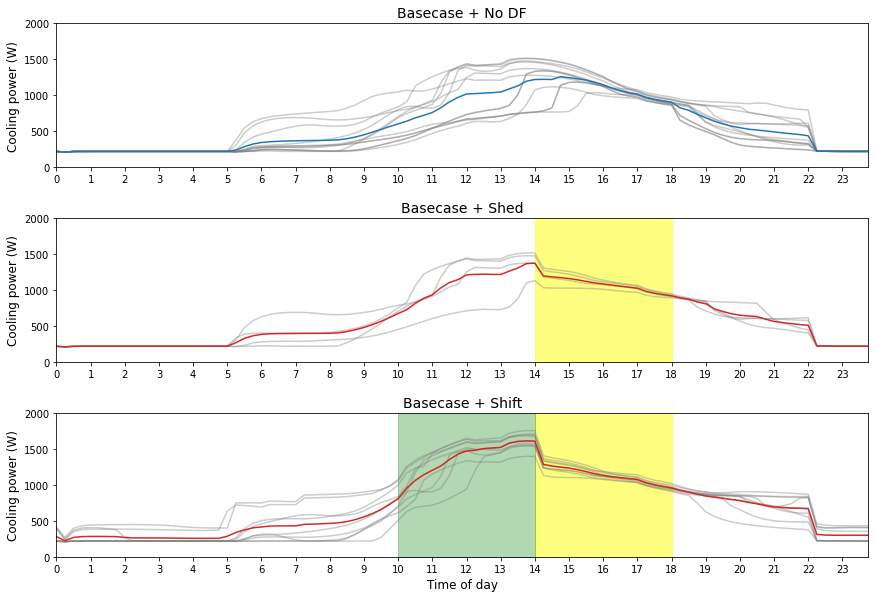

In [94]:
fig,ax=plt.subplots(nrows=3,ncols=1,figsize=(12,8))
# visualze individual profile + calculating average/maximum profile
fig.tight_layout(h_pad=3)
#fig.suptitle('Cooling Loads for Basecase: Baseline, Shed, and Shift Cases', fontsize=20, x=0.5, y=1.1)

if baseline_days.size != 0:
    for  i,i_day in enumerate(baseline_days):
        isdata21=sdata21[sdata21['day']==i_day]
        #print(isdf)
        if i==0:
            i_ma_avg=y_grid*0.0
            #print(i_ma_avg)
            temp=isdata21[f'{target}'].to_numpy()[:n_select] # [:n_select] means "take the first n_select-th data values"
            #print('kb1')
            #print(temp)
            i_ma_max=y_grid*0.0
            i_ma_max[:temp.shape[0]]=temp
            #print('kb2')
            #print(i_ma_max)
            max_val=np.max(i_ma_max)
            #print('kb3')
            #print(max_val)
        temp=isdata21[f'{target}'].to_numpy()[:n_select]
        y_grid_temp=y_grid*0.0
        y_grid_temp[:(temp.shape[0])]=temp
        ax[0].plot(x_grid,y_grid_temp,alpha=0.4,color="gray") # visualize individual data

        i_ma_avg[:(temp.shape[0])]=i_ma_avg[:(temp.shape[0])]+temp 
        #shape[0] probably gives the number of rows, or number of entries if 1D array 
        # for all the days, add up the load before 11 am
        #print('kb4')
        #print(i_ma_avg)
        max_val_temp=np.max(temp) 
        if max_val_temp>max_val: # looks like "max_val" is the first day maximum load
            i_ma_max=y_grid*0.0
            i_ma_max[:temp.shape[0]]=temp
            max_val=max_val_temp 
            # if the following days (not the first day) have a higher max load, update "max_val" to that max load
            # also update "i_ma_max" to represent the day with the highest max load
        

if baseline_days_1b.size != 0:
    for  i,i_day in enumerate(baseline_days_1b):
        isdata21=sdata21[sdata21['day']==i_day]
        #print(isdf)
        if baseline_days.size == 0:
            if i==0:
                i_ma_avg=y_grid*0.0
                #print(i_ma_avg)
                temp=isdata21[f'{target}'].to_numpy()[:n_select] # [:n_select] means "take the first n_select-th data values"
                #print('kb1')
                #print(temp)
                i_ma_max=y_grid*0.0
                i_ma_max[:temp.shape[0]]=temp
                #print('kb2')
                #print(i_ma_max)
                max_val=np.max(i_ma_max)
                #print('kb3')
                #print(max_val)
        temp=isdata21[f'{target}'].to_numpy()[:n_select]
        y_grid_temp=y_grid*0.0
        y_grid_temp[:(temp.shape[0])]=temp
        ax[0].plot(x_grid,y_grid_temp,alpha=0.4,color="gray") # visualize individual data

        i_ma_avg[:(temp.shape[0])]=i_ma_avg[:(temp.shape[0])]+temp 
        #shape[0] probably gives the number of rows, or number of entries if 1D array 
        # for all the days, add up the load before 11 am
        #print('kb4')
        #print(i_ma_avg)
        max_val_temp=np.max(temp) 
        if max_val_temp>max_val: # looks like "max_val" is the first day maximum load
            i_ma_max=y_grid*0.0
            i_ma_max[:temp.shape[0]]=temp
            max_val=max_val_temp 
            # if the following days (not the first day) have a higher max load, update "max_val" to that max load
            # also update "i_ma_max" to represent the day with the highest max load        
        

if baseline_days.size == 0:
    i_ma_avg=i_ma_avg/baseline_days_1b.shape[0]
elif baseline_days_1b.size == 0: 
    i_ma_avg=i_ma_avg/baseline_days.shape[0]
else:
    i_ma_avg=i_ma_avg/(baseline_days.shape[0]+baseline_days_1b.shape[0])        
        




i_ma_avg_baseline=i_ma_avg
i_ma_max_baseline=i_ma_max



if highlight=="max":
    ax[0].plot(x_grid,i_ma_max_baseline,color='tab:blue')
    #print(i_ma_max)
    ax[0].axhline(y=max_val, color='r', linestyle='dashed',linewidth=0.5) # the dashed horizontal line
    print(f'baseline: {max_val}')
else:
    ax[0].plot(x_grid,i_ma_avg,color='tab:blue')
    
    
#plotting the i_ma_avg or i_ma_max as blue line



if ((baseline_case==2) or (baseline_case==3)):
    ax[0].fill_between(np.arange(iisdf.shape[0]),0,max_val*1.5,where=iisdf['peak'].to_numpy(),alpha=0.5,color='yellow')
# "*1.5" is very random, just to make sure that you fill the whole y spectrum 
if baseline_case==3:
    ax[0].fill_between(np.arange(iisdf.shape[0]),0,max_val*1.5,where=iisdf['precool'].to_numpy(),alpha=0.3,color='green')


ax[0].set_xticks(np.arange(24)*4)
ax[0].set_xticklabels((np.arange(0,(24))).astype('int'))
ax[0].set_ylim(0,np.max(i_ma_max)*1.2)
ax[0].margins(x=0)
if highlight=="max":
    ax[0].set_ylabel("Maximum Cooling Power (W)",fontsize=12)
else:
    ax[0].set_ylabel("Cooling power (W)",fontsize=12)
ax[0].set_ylim(0,2000)    
ax[0].set_title("Basecase + No DF",fontsize=14)   
#print('kb5')
#print(np.max(sdf[f'{target}'].to_numpy()))  
    
   

 
#--------------------------------------------------------------------------------------------

if shed_days.size != 0:
    for i,i_day in enumerate(shed_days):
        isdata22=sdf[sdata22['day']==i_day]
        if i==0:
            i_ma_avg=y_grid*0.0
            temp=isdata22[f'{target}'].to_numpy()[:n_select]
            i_ma_max=y_grid*0.0
            i_ma_max[:temp.shape[0]]=temp
            max_val=np.max(i_ma_max)



        temp=isdata22[f'{target}'].to_numpy()[:n_select]
        y_grid_temp=y_grid*0.0
        y_grid_temp[:temp.shape[0]]=temp

        ax[1].plot(x_grid,y_grid_temp,alpha=0.4,color="gray")
        i_ma_avg[:(temp.shape[0])]=i_ma_avg[:(temp.shape[0])]+temp
        max_val_temp=np.max(temp) #np.max(isdf[f'{target}'].to_numpy()[:n_data])

        if max_val_temp>max_val:
            i_ma_max=y_grid*0.0
            i_ma_max[:temp.shape[0]]=temp
            max_val=max_val_temp 
            

if shed_days_1b.size != 0:          
    for i,i_day in enumerate(shed_days_1b):
        isdata22=sdata22[sdata22['day']==i_day]
        
        if shed_days.size == 0:
            if i==0:
                i_ma_avg=y_grid*0.0
                temp=isdata22[f'{target}'].to_numpy()[:n_select]
                i_ma_max=y_grid*0.0
                i_ma_max[:temp.shape[0]]=temp
                max_val=np.max(i_ma_max)        
        
        temp=isdata22[f'{target}'].to_numpy()[:n_select]
        y_grid_temp=y_grid*0.0
        y_grid_temp[:temp.shape[0]]=temp

        ax[1].plot(x_grid,y_grid_temp,alpha=0.4,color="gray")
        i_ma_avg[:(temp.shape[0])]=i_ma_avg[:(temp.shape[0])]+temp
        max_val_temp=np.max(temp) #np.max(isdf[f'{target}'].to_numpy()[:n_data])

        if max_val_temp>max_val:
            i_ma_max=y_grid*0.0
            i_ma_max[:temp.shape[0]]=temp
            max_val=max_val_temp 
        

if shed_days.size == 0:
    i_ma_avg=i_ma_avg/shed_days_1b.shape[0]
elif shed_days_1b.size == 0: 
    i_ma_avg=i_ma_avg/shed_days.shape[0]
else:
    i_ma_avg=i_ma_avg/(shed_days.shape[0]+shed_days_1b.shape[0])



i_ma_avg_mpc_ideal=i_ma_avg
i_ma_max_mpc_ideal=i_ma_max


if highlight=="max":
    ax[1].plot(x_grid,i_ma_max_mpc_ideal,color='tab:red')
    ax[1].axhline(y=max_val, color='r', linestyle='dashed',linewidth=0.5)
    print(f'ideal: {max_val}')
else:
    ax[1].plot(x_grid,i_ma_avg_mpc_ideal,label=r"$mean_i_{heat}(ideal)$",color='tab:red')
    
#if shed_days.size != 0:    
#ax[1].fill_between(np.arange(iisdf.shape[0]),0,np.max(sdf[f'{target}'].to_numpy()*1.5),where=iisdf['peak'].to_numpy(),alpha=0.2,color='grey')  

if ((shed_case==2) or (shed_case==3)):
    ax[1].fill_between(np.arange(iisdf.shape[0]),0,max_val*1.5,where=iisdf['peak'].to_numpy(),alpha=0.5,color='yellow') 
if shed_case==3:
    ax[1].fill_between(np.arange(iisdf.shape[0]),0,max_val*1.5,where=iisdf['precool'].to_numpy(),alpha=0.3,color='green')


ax[1].set_xticks(np.arange(24)*4)
ax[1].set_xticklabels((np.arange(0,(24))).astype('int'))
ax[1].set_ylim(0,np.max(i_ma_max)*1.2)
ax[1].margins(x=0)
if highlight=="max":
    ax[1].set_ylabel("Maximum Cooling Power (W)",fontsize=12)
else: 
    ax[1].set_ylabel("Cooling power (W)",fontsize=12)
ax[1].set_ylim(0,2000)   
ax[1].set_title("Basecase + Shed",fontsize=14)    
   
#-----------------------------------------------------------------

if shift_days.size != 0:
    for i,i_day in enumerate(shift_days):
        isdata23=sdata23[sdata23['day']==i_day]
        if i==0:
            i_ma_avg=y_grid*0.0
            temp=isdata23[f'{target}'].to_numpy()[:n_select]
            i_ma_max=y_grid*0.0
            i_ma_max[:temp.shape[0]]=temp
            max_val=np.max(i_ma_max)



        temp=isdata23[f'{target}'].to_numpy()[:n_select]
        y_grid_temp=y_grid*0.0
        y_grid_temp[:temp.shape[0]]=temp

        ax[2].plot(x_grid,y_grid_temp,alpha=0.4,color="gray")
        i_ma_avg[:(temp.shape[0])]=i_ma_avg[:(temp.shape[0])]+temp
        max_val_temp=np.max(temp) #np.max(isdf[f'{target}'].to_numpy()[:n_data])

        if max_val_temp>max_val:
            i_ma_max=y_grid*0.0
            i_ma_max[:temp.shape[0]]=temp
            max_val=max_val_temp 
            

if shift_days_1b.size != 0:          
    for i,i_day in enumerate(shift_days_1b):
        isdata23=sdata23[sdata23['day']==i_day]       
        if shift_days.size == 0:
            if i==0:
                i_ma_avg=y_grid*0.0
                temp=isdata23[f'{target}'].to_numpy()[:n_select]
                i_ma_max=y_grid*0.0
                i_ma_max[:temp.shape[0]]=temp
                max_val=np.max(i_ma_max)        
        
        temp=isdata23[f'{target}'].to_numpy()[:n_select]

        
        y_grid_temp=y_grid*0.0
        y_grid_temp[:temp.shape[0]]=temp

        ax[2].plot(x_grid,y_grid_temp,alpha=0.4,color="gray")
        i_ma_avg[:(temp.shape[0])]=i_ma_avg[:(temp.shape[0])]+temp
        max_val_temp=np.max(temp) #np.max(isdf[f'{target}'].to_numpy()[:n_data])

        if max_val_temp>max_val:
            i_ma_max=y_grid*0.0
            i_ma_max[:temp.shape[0]]=temp
            max_val=max_val_temp 
        

if shift_days.size == 0:
    i_ma_avg=i_ma_avg/shift_days_1b.shape[0]
elif shift_days_1b.size == 0: 
    i_ma_avg=i_ma_avg/shift_days.shape[0]
else:
    i_ma_avg=i_ma_avg/(shift_days.shape[0]+shift_days_1b.shape[0])



i_ma_avg_final_ideal=i_ma_avg
i_ma_max_final_ideal=i_ma_max


if highlight=="max":
    ax[2].plot(x_grid,i_ma_max_final_ideal,color='tab:red')
    ax[2].axhline(y=max_val, color='r', linestyle='dashed',linewidth=0.5)
    print(f'ideal: {max_val}')
else:
    ax[2].plot(x_grid,i_ma_avg_final_ideal,label=r"$mean_i_{heat}(ideal)$",color='tab:red')
    
#if shed_days.size != 0:    
#ax[1].fill_between(np.arange(iisdf.shape[0]),0,np.max(sdf[f'{target}'].to_numpy()*1.5),where=iisdf['peak'].to_numpy(),alpha=0.2,color='grey')  

if ((shift_case==2) or (shift_case==3)):
    ax[2].fill_between(np.arange(iisdf.shape[0]),0,max_val*1.5,where=iisdf['peak'].to_numpy(),alpha=0.5,color='yellow') 
if shift_case==3:
    ax[2].fill_between(np.arange(iisdf.shape[0]),0,max_val*1.5,where=iisdf['precool'].to_numpy(),alpha=0.3,color='green')


ax[2].set_xticks(np.arange(24)*4)
ax[2].set_xticklabels((np.arange(0,(24))).astype('int'))
ax[2].set_ylim(0,np.max(i_ma_max)*1.2)
ax[2].margins(x=0)
if highlight=="max":
    ax[2].set_ylabel("Maximum Cooling Power (W)",fontsize=12)
else: 
    ax[2].set_ylabel("Cooling power (W)",fontsize=12)
ax[2].set_ylim(0,2000)    
ax[2].set_xlabel("Time of day",fontsize=12)
ax[2].set_title("Basecase + Shift",fontsize=14) 

Text(0.5, 1.0, 'G36 + Shift')

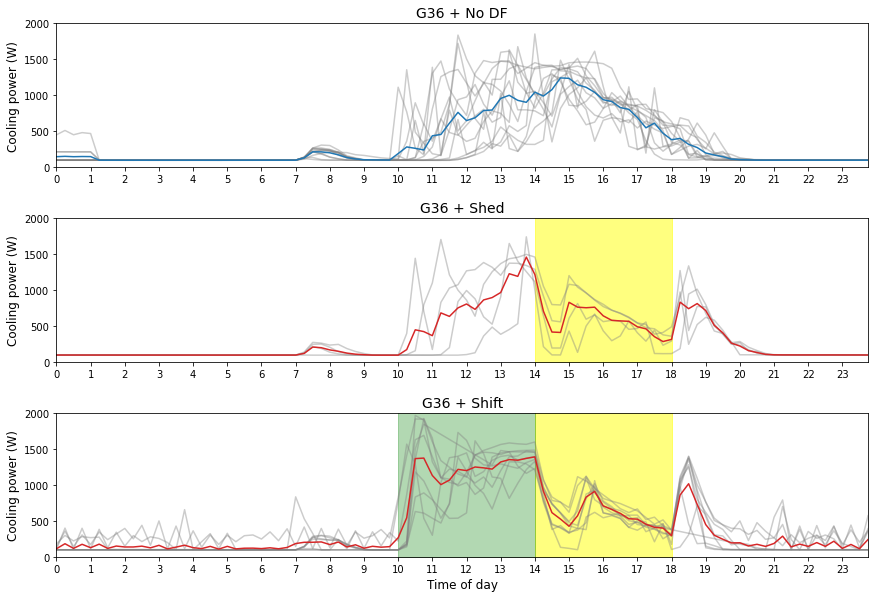

In [95]:


fig,ax=plt.subplots(nrows=3,ncols=1,figsize=(12,8))
# visualze individual profile + calculating average/maximum profile
fig.tight_layout(h_pad=3)
#fig.suptitle('Cooling Loads for G36: Baseline, Shed, and Shift Cases', fontsize=20, x=0.5, y=1.1)

if baseline_days.size != 0:
    for  i,i_day in enumerate(baseline_days):
        isdf=sdf[sdf['day']==i_day]
        #print(isdf)
        if i==0:
            i_ma_avg=y_grid*0.0
            #print(i_ma_avg)
            temp=isdf[f'{target}'].to_numpy()[:n_select] # [:n_select] means "take the first n_select-th data values"
            #print('kb1')
            #print(temp)
            i_ma_max=y_grid*0.0
            i_ma_max[:temp.shape[0]]=temp
            #print('kb2')
            #print(i_ma_max)
            max_val=np.max(i_ma_max)
            #print('kb3')
            #print(max_val)
        temp=isdf[f'{target}'].to_numpy()[:n_select]
        y_grid_temp=y_grid*0.0
        y_grid_temp[:(temp.shape[0])]=temp
        ax[0].plot(x_grid,y_grid_temp,alpha=0.4,color="gray") # visualize individual data

        i_ma_avg[:(temp.shape[0])]=i_ma_avg[:(temp.shape[0])]+temp 
        #shape[0] probably gives the number of rows, or number of entries if 1D array 
        # for all the days, add up the load before 11 am
        #print('kb4')
        #print(i_ma_avg)
        max_val_temp=np.max(temp) 
        if max_val_temp>max_val: # looks like "max_val" is the first day maximum load
            i_ma_max=y_grid*0.0
            i_ma_max[:temp.shape[0]]=temp
            max_val=max_val_temp 
            # if the following days (not the first day) have a higher max load, update "max_val" to that max load
            # also update "i_ma_max" to represent the day with the highest max load
        

if baseline_days_1b.size != 0:
    for  i,i_day in enumerate(baseline_days_1b):
        isdf1b=sdf1b[sdf1b['day']==i_day]
        #print(isdf)
        if baseline_days.size == 0:
            if i==0:
                i_ma_avg=y_grid*0.0
                #print(i_ma_avg)
                temp=isdf1b[f'{target}'].to_numpy()[:n_select] # [:n_select] means "take the first n_select-th data values"
                #print('kb1')
                #print(temp)
                i_ma_max=y_grid*0.0
                i_ma_max[:temp.shape[0]]=temp
                #print('kb2')
                #print(i_ma_max)
                max_val=np.max(i_ma_max)
                #print('kb3')
                #print(max_val)
        temp=isdf1b[f'{target}'].to_numpy()[:n_select]
        y_grid_temp=y_grid*0.0
        y_grid_temp[:(temp.shape[0])]=temp
        ax[0].plot(x_grid,y_grid_temp,alpha=0.4,color="gray") # visualize individual data

        i_ma_avg[:(temp.shape[0])]=i_ma_avg[:(temp.shape[0])]+temp 
        #shape[0] probably gives the number of rows, or number of entries if 1D array 
        # for all the days, add up the load before 11 am
        #print('kb4')
        #print(i_ma_avg)
        max_val_temp=np.max(temp) 
        if max_val_temp>max_val: # looks like "max_val" is the first day maximum load
            i_ma_max=y_grid*0.0
            i_ma_max[:temp.shape[0]]=temp
            max_val=max_val_temp 
            # if the following days (not the first day) have a higher max load, update "max_val" to that max load
            # also update "i_ma_max" to represent the day with the highest max load        
        

if baseline_days.size == 0:
    i_ma_avg=i_ma_avg/baseline_days_1b.shape[0]
elif baseline_days_1b.size == 0: 
    i_ma_avg=i_ma_avg/baseline_days.shape[0]
else:
    i_ma_avg=i_ma_avg/(baseline_days.shape[0]+baseline_days_1b.shape[0])        
        




i_ma_avg_baseline=i_ma_avg
i_ma_max_baseline=i_ma_max



if highlight=="max":
    ax[0].plot(x_grid,i_ma_max_baseline,color='tab:blue')
    #print(i_ma_max)
    ax[0].axhline(y=max_val, color='r', linestyle='dashed',linewidth=0.5) # the dashed horizontal line
    print(f'baseline: {max_val}')
else:
    ax[0].plot(x_grid,i_ma_avg,color='tab:blue')
    
    
#plotting the i_ma_avg or i_ma_max as blue line



if ((baseline_case==2) or (baseline_case==3)):
    ax[0].fill_between(np.arange(iisdf.shape[0]),0,max_val*1.5,where=iisdf['peak'].to_numpy(),alpha=0.5,color='yellow')
# "*1.5" is very random, just to make sure that you fill the whole y spectrum 
if baseline_case==3:
    ax[0].fill_between(np.arange(iisdf.shape[0]),0,max_val*1.5,where=iisdf['precool'].to_numpy(),alpha=0.3,color='green')


ax[0].set_xticks(np.arange(24)*4)
ax[0].set_xticklabels((np.arange(0,(24))).astype('int'))
ax[0].set_ylim(0,np.max(i_ma_max)*1.2)
ax[0].margins(x=0)
if highlight=="max":
    ax[0].set_ylabel("Maximum Cooling Power (W)",fontsize=12)
else:
    ax[0].set_ylabel("Cooling power (W)",fontsize=12)

ax[0].set_ylim(0,2000)
ax[0].set_title("G36 + No DF",fontsize=14)   
#print('kb5')
#print(np.max(sdf[f'{target}'].to_numpy()))  
    
    
#--------------------------------------------------------------------------------------------

if shed_days.size != 0:
    for i,i_day in enumerate(shed_days):
        isdf=sdf[sdf['day']==i_day]
        if i==0:
            i_ma_avg=y_grid*0.0
            temp=isdf[f'{target}'].to_numpy()[:n_select]
            i_ma_max=y_grid*0.0
            i_ma_max[:temp.shape[0]]=temp
            max_val=np.max(i_ma_max)



        temp=isdf[f'{target}'].to_numpy()[:n_select]
        y_grid_temp=y_grid*0.0
        y_grid_temp[:temp.shape[0]]=temp

        ax[1].plot(x_grid,y_grid_temp,alpha=0.4,color="gray")
        i_ma_avg[:(temp.shape[0])]=i_ma_avg[:(temp.shape[0])]+temp
        max_val_temp=np.max(temp) #np.max(isdf[f'{target}'].to_numpy()[:n_data])

        if max_val_temp>max_val:
            i_ma_max=y_grid*0.0
            i_ma_max[:temp.shape[0]]=temp
            max_val=max_val_temp 
            

if shed_days_1b.size != 0:          
    for i,i_day in enumerate(shed_days_1b):
        isdf1b=sdf1b[sdf1b['day']==i_day]
        
        if shed_days.size == 0:
            if i==0:
                i_ma_avg=y_grid*0.0
                temp=isdf1b[f'{target}'].to_numpy()[:n_select]
                i_ma_max=y_grid*0.0
                i_ma_max[:temp.shape[0]]=temp
                max_val=np.max(i_ma_max)        
        
        temp=isdf1b[f'{target}'].to_numpy()[:n_select]
        y_grid_temp=y_grid*0.0
        y_grid_temp[:temp.shape[0]]=temp

        ax[1].plot(x_grid,y_grid_temp,alpha=0.4,color="gray")
        i_ma_avg[:(temp.shape[0])]=i_ma_avg[:(temp.shape[0])]+temp
        max_val_temp=np.max(temp) #np.max(isdf[f'{target}'].to_numpy()[:n_data])

        if max_val_temp>max_val:
            i_ma_max=y_grid*0.0
            i_ma_max[:temp.shape[0]]=temp
            max_val=max_val_temp 
        

if shed_days.size == 0:
    i_ma_avg=i_ma_avg/shed_days_1b.shape[0]
elif shed_days_1b.size == 0: 
    i_ma_avg=i_ma_avg/shed_days.shape[0]
else:
    i_ma_avg=i_ma_avg/(shed_days.shape[0]+shed_days_1b.shape[0])



i_ma_avg_mpc_ideal=i_ma_avg
i_ma_max_mpc_ideal=i_ma_max


if highlight=="max":
    ax[1].plot(x_grid,i_ma_max_mpc_ideal,color='tab:red')
    ax[1].axhline(y=max_val, color='r', linestyle='dashed',linewidth=0.5)
    print(f'ideal: {max_val}')
else:
    ax[1].plot(x_grid,i_ma_avg_mpc_ideal,label=r"$mean_i_{heat}(ideal)$",color='tab:red')
    
#if shed_days.size != 0:    
#ax[1].fill_between(np.arange(iisdf.shape[0]),0,np.max(sdf[f'{target}'].to_numpy()*1.5),where=iisdf['peak'].to_numpy(),alpha=0.2,color='grey')  

if ((shed_case==2) or (shed_case==3)):
    ax[1].fill_between(np.arange(iisdf.shape[0]),0,max_val*1.5,where=iisdf['peak'].to_numpy(),alpha=0.5,color='yellow') 
if shed_case==3:
    ax[1].fill_between(np.arange(iisdf.shape[0]),0,max_val*1.5,where=iisdf['precool'].to_numpy(),alpha=0.3,color='green')


ax[1].set_xticks(np.arange(24)*4)
ax[1].set_xticklabels((np.arange(0,(24))).astype('int'))
ax[1].set_ylim(0,np.max(i_ma_max)*1.2)
ax[1].margins(x=0)
if highlight=="max":
    ax[1].set_ylabel("Maximum Cooling Power (W)",fontsize=12)
else: 
    ax[1].set_ylabel("Cooling power (W)",fontsize=12)

ax[1].set_ylim(0,2000)
ax[1].set_title("G36 + Shed",fontsize=14)    
    
#--------------------------------------------------------------------------------------------

if shift_days.size != 0:
    for i,i_day in enumerate(shift_days):
        isdf=sdf[sdf['day']==i_day]
        if i==0:
            i_ma_avg=y_grid*0.0
            temp=isdf[f'{target}'].to_numpy()[:n_select]
            i_ma_max=y_grid*0.0
            i_ma_max[:temp.shape[0]]=temp
            max_val=np.max(i_ma_max)



        temp=isdf[f'{target}'].to_numpy()[:n_select]
        y_grid_temp=y_grid*0.0
        y_grid_temp[:temp.shape[0]]=temp

        ax[2].plot(x_grid,y_grid_temp,alpha=0.4,color="gray")
        i_ma_avg[:(temp.shape[0])]=i_ma_avg[:(temp.shape[0])]+temp
        max_val_temp=np.max(temp) #np.max(isdf[f'{target}'].to_numpy()[:n_data])

        if max_val_temp>max_val:
            i_ma_max=y_grid*0.0
            i_ma_max[:temp.shape[0]]=temp
            max_val=max_val_temp 
            

if shift_days_1b.size != 0:          
    for i,i_day in enumerate(shift_days_1b):
        isdf1b=sdf1b[sdf1b['day']==i_day]
        
        if shift_days.size == 0:
            if i==0:
                i_ma_avg=y_grid*0.0
                temp=isdf1b[f'{target}'].to_numpy()[:n_select]
                i_ma_max=y_grid*0.0
                i_ma_max[:temp.shape[0]]=temp
                max_val=np.max(i_ma_max)        
        
        temp=isdf1b[f'{target}'].to_numpy()[:n_select]
        y_grid_temp=y_grid*0.0
        y_grid_temp[:temp.shape[0]]=temp

        ax[2].plot(x_grid,y_grid_temp,alpha=0.4,color="gray")
        i_ma_avg[:(temp.shape[0])]=i_ma_avg[:(temp.shape[0])]+temp
        max_val_temp=np.max(temp) #np.max(isdf[f'{target}'].to_numpy()[:n_data])

        if max_val_temp>max_val:
            i_ma_max=y_grid*0.0
            i_ma_max[:temp.shape[0]]=temp
            max_val=max_val_temp 
        

if shift_days.size == 0:
    i_ma_avg=i_ma_avg/shift_days_1b.shape[0]
elif shift_days_1b.size == 0: 
    i_ma_avg=i_ma_avg/shift_days.shape[0]
else:
    i_ma_avg=i_ma_avg/(shift_days.shape[0]+shift_days_1b.shape[0])



i_ma_avg_final_ideal=i_ma_avg
i_ma_max_final_ideal=i_ma_max


if highlight=="max":
    ax[2].plot(x_grid,i_ma_max_final_ideal,color='tab:red')
    ax[2].axhline(y=max_val, color='r', linestyle='dashed',linewidth=0.5)
    print(f'ideal: {max_val}')
else:
    ax[2].plot(x_grid,i_ma_avg_final_ideal,label=r"$mean_i_{heat}(ideal)$",color='tab:red')
    
#if shed_days.size != 0:    
#ax[1].fill_between(np.arange(iisdf.shape[0]),0,np.max(sdf[f'{target}'].to_numpy()*1.5),where=iisdf['peak'].to_numpy(),alpha=0.2,color='grey')  

if ((shift_case==2) or (shift_case==3)):
    ax[2].fill_between(np.arange(iisdf.shape[0]),0,max_val*1.5,where=iisdf['peak'].to_numpy(),alpha=0.5,color='yellow') 
if shift_case==3:
    ax[2].fill_between(np.arange(iisdf.shape[0]),0,max_val*1.5,where=iisdf['precool'].to_numpy(),alpha=0.3,color='green')


ax[2].set_xticks(np.arange(24)*4)
ax[2].set_xticklabels((np.arange(0,(24))).astype('int'))
ax[2].set_ylim(0,np.max(i_ma_max)*1.2)
ax[2].margins(x=0)
if highlight=="max":
    ax[2].set_ylabel("Maximum Cooling Power (W)",fontsize=12)
else: 
    ax[2].set_ylabel("Cooling power (W)",fontsize=12)
ax[2].set_ylim(0,2000)    
ax[2].set_xlabel("Time of day",fontsize=12)
ax[2].set_title("G36 + Shift",fontsize=14) 

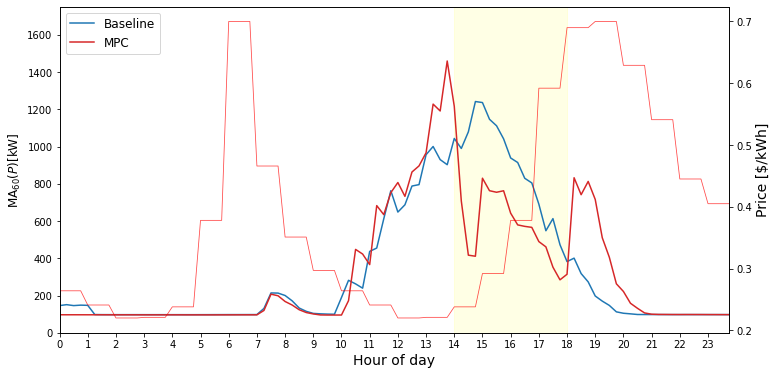

In [96]:


#iisdf=sdf[sdf['day']==baseline_days[0]]
if baseline_days.size != 0:
    iisdf=sdf[sdf['day']==baseline_days[0]]
else:
    iisdf=sdf1b[sdf1b['day']==baseline_days_1b[0]]

fig,ax=plt.subplots(nrows=1,ncols=1,figsize=(12,6))

ax2 = ax.twinx()
ax.plot(i_ma_avg_baseline,label=r"Baseline",color="tab:blue")
ax.plot(i_ma_avg_mpc_ideal,label=r"MPC",color="tab:red")

#ax.fill_between(np.arange(iisdf.shape[0]),-1,np.max(sdf[f'{target}'].to_numpy())*1.5,where=iisdf['peak'].to_numpy(),alpha=0.1,color='yellow') 
#ax.fill_between(np.arange(iisdf.shape[0]),-1,np.max(sdf[f'{target}'].to_numpy())*1.5,where=iisdf['precool'].to_numpy(),alpha=0.1,color='green')  
if ((shed_case==2) or (shed_case==3)):
    ax.fill_between(np.arange(iisdf.shape[0]),-1,max_val*1.5,where=iisdf['peak'].to_numpy(),alpha=0.1,color='yellow') 
if shed_case==3:
    ax.fill_between(np.arange(iisdf.shape[0]),-1,max_val*1.5,where=iisdf['precool'].to_numpy(),alpha=0.1,color='green')  



ax.set_xticks(np.arange(24)*4)
ax.set_xticklabels((np.arange(0,(24))).astype('int'))
ax.set_xlabel("Hour of day",fontsize=14)
#ax.set_ylabel(f"{target}",fontsize=14)
ax.set_ylabel(r"",fontsize=14)

ax2.plot(iisdf['price'].to_numpy(),label=r'Price',color="red",alpha=0.7,linewidth=0.8)
ax.set_ylabel(r"MA$_{60}(P)$[kW]",fontsize=12)
ax2.set_ylabel("Price [$/kWh]",fontsize=14)
ax.legend(fontsize=12,loc="upper left")
ax.margins(x=0)
ax.set_ylim((0,np.max([np.max(i_ma_avg_mpc_ideal),np.max(i_ma_avg_baseline)])*1.2))
fig.savefig("price.png",dpi=300,bbox_inches='tight')
